# Random matrix theory

In this notebook, we analyze the correlation structure of a random system and of two simple stylized models of financial markets.

## Correlation matrix

A correlation matrix, $C$, is a matrix with entries $c_{i,j}$ given by

\begin{equation}
    c_{i,j} = \frac{1}{T} \sum_{t=1}^T \frac{(r_{i,t} - \mu_i)(r_{j,t} - \mu_j)}{\sigma_i \sigma_j} = \frac{1}{T} \sum_{t=1}^T x_{i,t}x_{j,t}
\end{equation}

where $r_{i,t}$ is the return of stock $i$ at time $t$, $\mu_i$ and $\sigma_i$ are the mean and standard deviation of $r_i$, respectively, and $x_{i,t}$ denotes the standardized return of stock $i$ at time $t$, i.e.,

\begin{equation}
    x_{i,t} = \frac{r_{i,t} - \mu_i}{\sigma_i}.
\end{equation}

## Random matrix theory

Random matrix theory is a theory to disentangle signal from noise based on the spectral properties of matrices. In this notebook, we focus on correlation matrices. In practice, we measure deviations from the spectral properties of an empirical correlation matrix and the average properties of a suitable ensemble of random matrices.

### Marcenko-Pastur distribution

It is the average eigenvalue density of a correlation matrix with rectangularity ratio $q = N/T$ (i.e., constructed from $N$ time series of length $T$ of i.i.d. Gaussian random numbers with zero mean and standard deviation $\sigma$). The distribution is given by

\begin{equation}
    p(\lambda) = \frac{1}{2 \pi q \sigma^2} \frac{\sqrt{(\lambda - \lambda_-)(\lambda_+ - \lambda)}}{\lambda}.
\end{equation}

where $\lambda$ denotes the eigenvalue and

\begin{equation}
    \lambda_{\pm} = \sigma^2(1 \pm \sqrt{q})^2.
\end{equation}

For illustration purpose, let suppose we have time series of length $T=500$ for $N=100$ stocks. We assume that the market is fully random and generate 500 random correlation matrices. Then, we plot the Marcenko-Pastur distribution on top of the histogram of the eigenvalues.

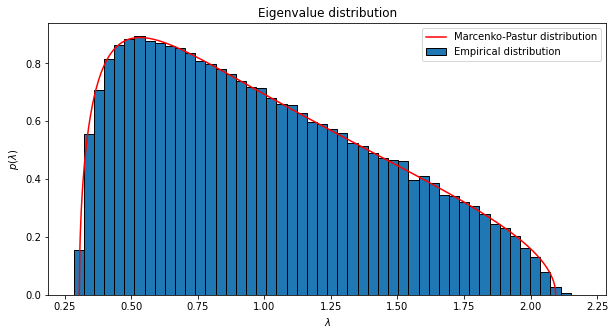

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of time series
T = 500 # length of time series
q = N/T # rectangularity ratio
sigma = 1 # standard deviation of the time series values

""" MARCENKO-PASTUR DISTRIBUTION """

Nm = 500 # number of matrices to generate

L = [] # empty array to collect all eigenvalues

for i in range(Nm):
    # Generate random matrix
    X = sigma*np.random.normal(loc=0, scale=1, size=(N, T))
    C = np.corrcoef(X)
    L = np.append(L, np.linalg.eig(C)[0]) # append eigenvalues

# Marcenko-Pastur distribution
lp = sigma**2*(1+np.sqrt(q))**2
lm = sigma**2*(1-np.sqrt(q))**2
x = np.linspace(lm, lp, 1000)
p = np.sqrt((x-lm)*(lp-x))/(2*np.pi*q*sigma**2*x)

# Plot the distribution of the eigenvalues along with the MP distribution
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    
ax.hist(L, 50, density=True, histtype='bar', ec='k', label='Empirical distribution') # eigenvalues distribution
ax.plot(x, p, 'r', label='Marcenko-Pastur distribution')    
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$p(\lambda)$')
ax.set_title('Marcenko-Pastur distribution')
ax.set_title('Eigenvalue distribution')
ax.legend(loc='best');

Note that as we increase the length of the time series, the distribution shrinks towards 1.

### Porter-Thomas law

The eigenvector components of a random matrix follow a Gaussian distribution with zero mean and standard deviation $1/\sqrt{N}$, i.e.,

\begin{equation}
    p(x) = \sqrt{\frac{N}{2\pi}} \exp \left( -\frac{x^2N}{2} \right).
\end{equation}

Let's visualize this.

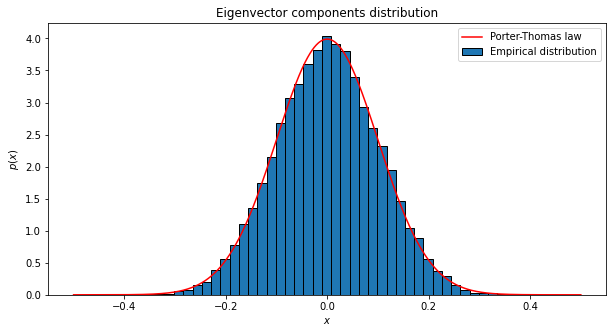

In [2]:
""" PORTER-THOMAS LAW """

# Eigenvalues and eigenvector of last correlation matrix
L, V = np.linalg.eig(C) # eigenvalues and eigenvectors
L = np.diag(L) # diagonal matrix of eigenvalues

# Porter-Thomas law
s = 1/np.sqrt(N) # standard deviation of Porter-Thomas law
x = np.linspace(-5*s, 5*s, 1000)
p = np.exp(-x**2/(2*s**2))/np.sqrt(2*np.pi*s**2)

# Plot Porter-Thomas law and distribution of eigenvectors components
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(np.ravel(V), 40, density=True, histtype='bar', ec='k', label='Empirical distribution')
ax.plot(x, p, 'r', label='Porter-Thomas law')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p(x)$')
ax.set_title('Porter-Thomas law')
ax.set_title('Eigenvector components distribution')
ax.legend(loc='best');

## One-factor model

Let consider a one-factor model where stock returns are given by

\begin{equation}
    X_{i,t} = \sigma r_{i,t} + \epsilon \gamma_t
\end{equation}

where $X_{i,t}$ is the return of stock $i$ at time $t$, $r_{i,t}$ is some idiosyncratic noise (e.g., Gaussian, Levy, etc), $\gamma_t$ is a factor common to all stocks and $\epsilon / \sigma$ is the relative importance of the common factor vs idiosyncratic noise. 

Let's construct the time series of stocks driven by this one-factor model and repeat the steps done with the random returns. First, we compare the eigenvalue distribution to the Marcenko-Pastur distribution.

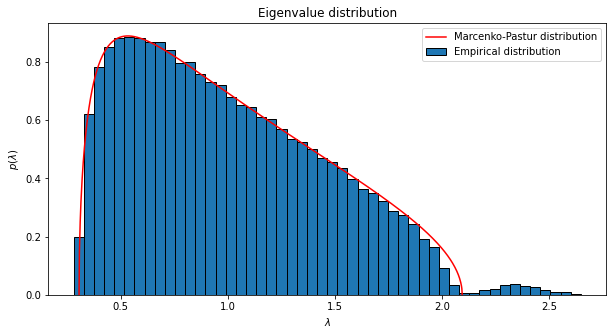

In [3]:
epsilon = 0.1 # standard deviation of factor common to all variables

L = [] # empty array to collect all eigenvalues
V = [] # empty array to collect leading eigenvectors

for i in range(Nm):
    
    # Forming time series as idiosyncratic part + common factor
    X = sigma*np.random.normal(loc=0, scale=1, size=(N, T)) \
        + epsilon*np.ones((N, T))*np.random.normal(loc=0, scale=1, size=(1, T))    
    C = np.corrcoef(X)    
    eig_value, eig_vector = np.linalg.eig(C) 
    
    # Sort eigenvalues from largest to smallest and corresponding eigenvector
    idx = eig_value.argsort()[::-1]   
    eig_value = eig_value[idx]
    eig_vector = eig_vector[:,idx]
    
    L = np.append(L, eig_value)
    V = np.append(V, eig_vector[:,0]) # first eigenvector

# Marcenko-Pastur distribution
lp = sigma**2*(1+np.sqrt(q))**2
lm = sigma**2*(1-np.sqrt(q))**2
x = np.linspace(lm, lp, 1000)
p = np.sqrt((x-lm)*(lp-x))/(2*np.pi*q*sigma**2*x)

# Plot the distribution of the eigenvalues along with the MP distribution
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    
ax.hist(L, 50, density=True, histtype='bar', ec='k', label='Empirical distribution') # eigenvalues distribution
ax.plot(x, p, 'r', label='Marcenko-Pastur distribution')    
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$p(\lambda)$')
ax.set_title('Eigenvalue distribution')
ax.legend(loc='best');

We see that a bulk of the eigenvalues is still captured by the Marcenko-Pastur distribution. However, there are eigenvalues on the right of the distribution. Actually, there are $T$ eigenvalues on the right of the distribution. It is the largest eigenvalue of each simulation. It is a clear indication that there is a common factor driving the stocks together (1 large isolated eigenvalue). Increasing $\epsilon$ would further increase the discrepancies. 

Now, we compare the distribution of the first eigenvectors to the Gaussian distribution (i.e., Porter-Thomas law).

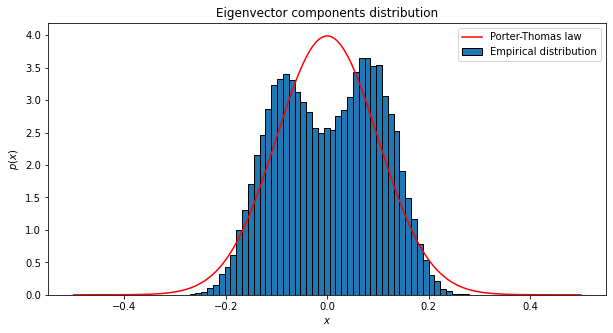

In [4]:
# Porter-Thomas law
s = 1/np.sqrt(N) # standard deviation of Porter-Thomas law
x = np.linspace(-5*s, 5*s, 1000)
p = np.exp(-x**2/(2*s**2))/np.sqrt(2*np.pi*s**2)

# Plot Porter-Thomas law and distribution of eigenvectors components
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(V, 50, density=True, histtype='bar', ec='k', label='Empirical distribution')
ax.plot(x, p, 'r', label='Porter-Thomas law')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p(x)$')
ax.set_title('Eigenvector components distribution')
ax.legend(loc='best');

There is a clear departure from the Porter-Thomas law. 

## Two-factors model

Now, let consider a two-factors model where stock returns are given by

\begin{equation}
    X_{i,t} = \sigma r_{i,t} + \epsilon_1 \gamma_{1,t}
\end{equation}

for $i = 1, 2,..., M$ and 

\begin{equation}
    X_{i,t} = \sigma r_{i,t} + \epsilon_2 \gamma_{2,t}
\end{equation}

for $i = M+1, M+2,..., N$.

As before, let's construct the time series and analyze the eigenvalue distribution. We assume that half of the stocks is affected by the first factor and the other half is affected by the second factor.

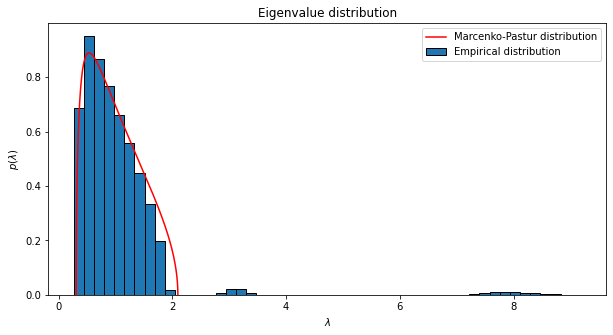

In [5]:
epsilon1 = 0.4 # standard deviation of the first factor
epsilon2 = 0.2 # standard deviation of the second factor
f = 0.5 # fraction of variables affected by the first factor

L = []
V = []

for i in range(Nm):
    aux1 = np.ones((N, T))*np.random.normal(loc=0, scale=1, size=(1, T)) # first factor
    aux1[:round(f*N), :] = 0 # selecting f*N variables as those affected by the first factor
    aux2 = np.ones((N, T))*np.random.normal(loc=0, scale=1, size=(1, T)) # second factor
    aux2[round(f*N):,:] = 0 # selecting remaining variables as those affected by the second factor
    
    # Forming time series as indiosyncratic part plus factors
    X = sigma*np.random.normal(loc=0, scale=1, size=(N, T)) + epsilon1*aux1 \
        + epsilon2*aux2
        
    C = np.corrcoef(X) 
    eig_value, eig_vector = np.linalg.eig(C) 
    
    # Sort eigenvalues from largest to smallest and corresponding eigenvector
    idx = eig_value.argsort()[::-1]   
    eig_value = eig_value[idx]
    eig_vector = eig_vector[:,idx]
    
    L = np.append(L, eig_value)
    V = np.append(V, eig_vector[:,0]) # first eigenvector  
    
# Marcenko-Pastur distribution
lp = sigma**2*(1+np.sqrt(q))**2
lm = sigma**2*(1-np.sqrt(q))**2
x = np.linspace(lm, lp, 1000)
p = np.sqrt((x-lm)*(lp-x))/(2*np.pi*q*sigma**2*x)

# Plot the distribution of the eigenvalues along with the MP distribution
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    
ax.hist(L, 50, density=True, histtype='bar', ec='k', label='Empirical distribution') # eigenvalues distribution
ax.plot(x, p, 'r', label='Marcenko-Pastur distribution')    
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$p(\lambda)$')
ax.set_title('Eigenvalue distribution')
ax.legend(loc='best');

This time, there are two peaks on the right of the distribution. Those correspond to the two factors. If the epsilon of the two factors were equal, we would not see the different groups on the plot. However, by looking at the eigenvalues of the simulation, we would see that two eigenvalues are large.

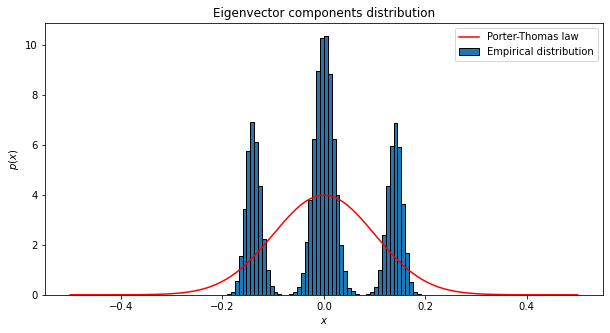

In [6]:
# Porter-Thomas law
s = 1/np.sqrt(N) # standard deviation of Porter-Thomas law
x = np.linspace(-5*s, 5*s, 1000)
p = np.exp(-x**2/(2*s**2))/np.sqrt(2*np.pi*s**2)

# Plot Porter-Thomas law and distribution of eigenvectors components
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(V, 50, density=True, histtype='bar', ec='k', label='Empirical distribution')
ax.plot(x, p, 'r', label='Porter-Thomas law')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p(x)$')       
ax.set_title('Eigenvector components distribution')
ax.legend(loc='best');